# Step 1 - Importing all libraries used throughout the project

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency


# Step 2 - Importing data frames, analyzing and cleaning

## 2.1.1 - Importing Clients Dataframe (df_final_demo)

In [205]:
# Import first data frame 
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


## 2.1.2 Exploring the Dataframe's columns

*Display basic information about the dataset*

In [206]:
display(df_final_demo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


None

*Displaying iformation about **clnt_tenure_yr** (client tenure in years), as well as plotting a histogram to visualize the column's values*

In [207]:

df_final_demo['clnt_tenure_yr'].value_counts() 

clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

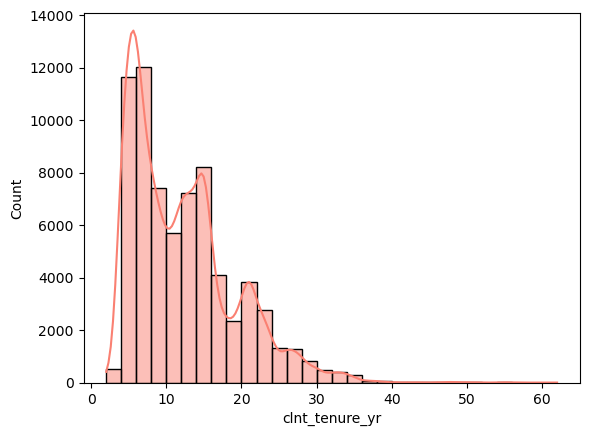

In [208]:
#Plotting a histogram for the 'clnt_tenure_yr' column 
sns.histplot(df_final_demo['clnt_tenure_yr'], kde=True, bins=30, color="salmon")

*Displaying iformation about **clnt_age** (client age), as well as plotting a histogram to visualize the column's values*

In [209]:
# Analysis in the client data frame
df_final_demo['clnt_age'].value_counts()

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

<Axes: xlabel='clnt_age', ylabel='Count'>

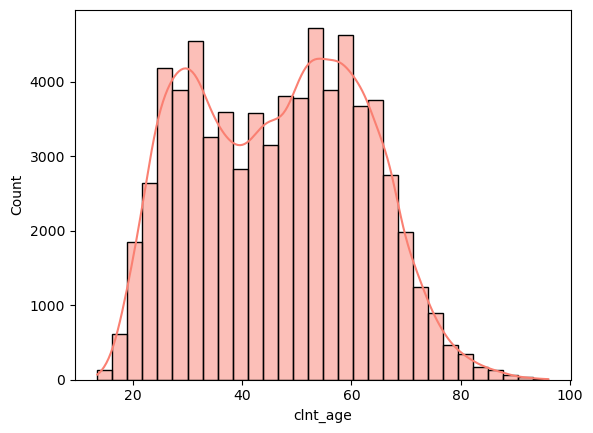

In [210]:
#Plotting a histogram for the 'clnt_age' column 
sns.histplot(df_final_demo['clnt_age'], kde=True, bins=30, color="salmon")

*Displaying iformation about **gendr** (gender), as well as creating a pie chart to visualize the column's values*

In [211]:
gender= df_final_demo.groupby("gendr")
gender.size() 

gendr
F    22746
M    23724
U    24122
X        3
dtype: int64

<Axes: ylabel='count'>

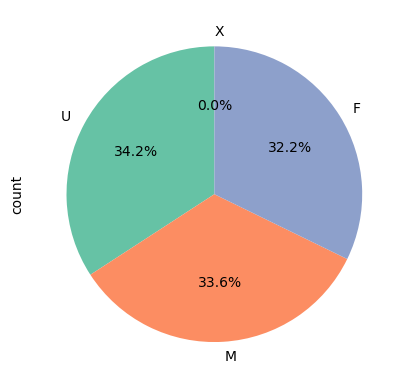

In [212]:
df_final_demo['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

*Displaying iformation about **num_accounts** (number of accounts), as well as creating a pie chart and histogram to visualize the column's values*

In [213]:
df_final_demo['num_accts'].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: ylabel='count'>

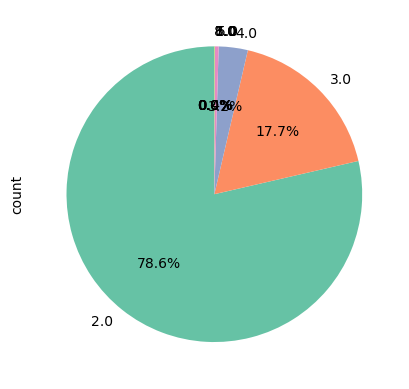

In [214]:
df_final_demo['num_accts'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

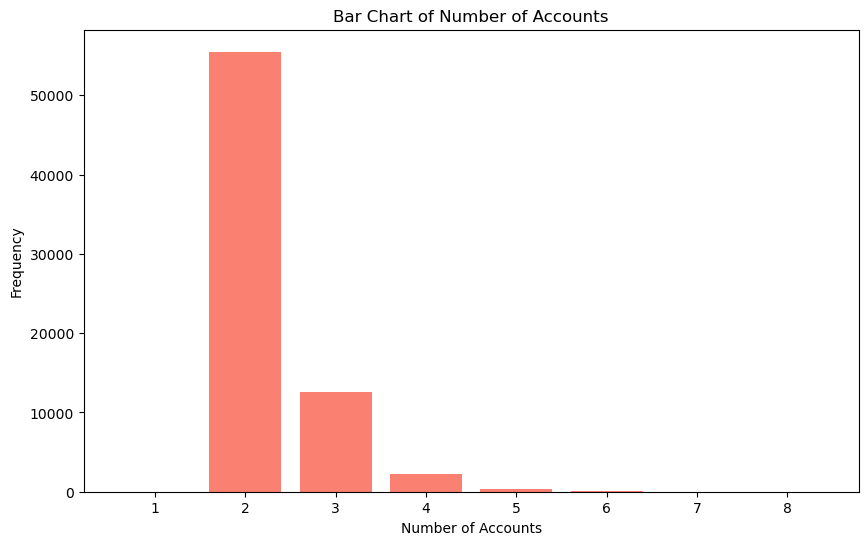

In [215]:
#Plotting a histogram for the 'num_accts' column 
# Assuming df_final_demo is your dataframe and 'num_accts' is your column
num_accts_counts = df_final_demo['num_accts'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(num_accts_counts.index, num_accts_counts.values, color='salmon')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.title('Bar Chart of Number of Accounts')
plt.show()

*Displaying iformation about **bal** (balance)*

In [216]:
df_final_demo['bal'].value_counts()

bal
31188.62     5
29388.51     4
31398.74     3
29389.11     3
29388.50     3
            ..
26088.34     1
51203.28     1
94714.11     1
52086.48     1
157498.73    1
Name: count, Length: 70333, dtype: int64

In [217]:
df_final_demo.bal.describe()

count    7.059500e+04
mean     1.474452e+05
std      3.015087e+05
min      1.378942e+04
25%      3.734683e+04
50%      6.333290e+04
75%      1.375449e+05
max      1.632004e+07
Name: bal, dtype: float64

*Displaying iformation about **logons_6_mnth** (log on in the past 6 months), as well as creating a histogram to visualize the column's values*

In [218]:
df_final_demo['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

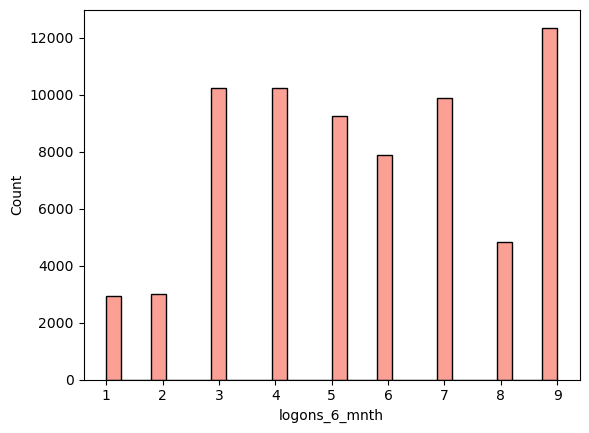

In [219]:
#Plotting a histogram for the 'logons_6_mnth' column 
sns.histplot(df_final_demo['logons_6_mnth'], bins=30, color="salmon")

## 2.1.3 - Analyzing Client Demographics

First, we will create a new column to visualize the total tenure in months.

In [220]:
# Calculate client tenure in months
df_final_demo['total_tenure_months'] = df_final_demo['clnt_tenure_yr'] * 12 + df_final_demo['clnt_tenure_mnth']

In [221]:
# Display the first few rows to inspect the calculation
print(df_final_demo[['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'total_tenure_months']].head())

   client_id  clnt_tenure_yr  clnt_tenure_mnth  total_tenure_months
0     836976             6.0              73.0                145.0
1    2304905             7.0              94.0                178.0
2    1439522             5.0              64.0                124.0
3    1562045            16.0             198.0                390.0
4    5126305            12.0             145.0                289.0


Second, we will categorize the the clients based on their total tenure (in months). They can either be **New** or **Long Standing**

In [222]:
# Categorize clients as new or long-standing
df_final_demo['client_status'] = np.where(df_final_demo['total_tenure_months'] <= 24, 'New', 'Long-standing')

In [223]:
# Display the first few rows of the dataframe to inspect the new columns
print(df_final_demo[['client_id', 'client_status', 'total_tenure_months']].head())

   client_id  client_status  total_tenure_months
0     836976  Long-standing                145.0
1    2304905  Long-standing                178.0
2    1439522  Long-standing                124.0
3    1562045  Long-standing                390.0
4    5126305  Long-standing                289.0


Third, it is important to know whether the clients are **young** or **old**. 

In [224]:
# Categorize clients as younger or older
df_final_demo['age_group'] = np.where(df_final_demo['clnt_age'] <=df_final_demo['clnt_age'].median(), 'Younger', 'Older')

In [225]:
print(df_final_demo[['client_id', 'clnt_age', 'age_group']].head())

   client_id  clnt_age age_group
0     836976      60.5     Older
1    2304905      58.0     Older
2    1439522      32.0   Younger
3    1562045      49.0     Older
4    5126305      33.0   Younger


In [226]:
df_final_demo["age_group"].value_counts()

age_group
Younger    35527
Older      35082
Name: count, dtype: int64

## 2.1.3 - Identifying Primary Clients

In [227]:
# Primary clients' demographics
primary_clients = df_final_demo.groupby(['client_status', 'age_group']).size().reset_index(name='count')
print("Primary Clients by Tenure and Age Group:")
print(primary_clients)

Primary Clients by Tenure and Age Group:
   client_status age_group  count
0  Long-standing     Older  35082
1  Long-standing   Younger  35527


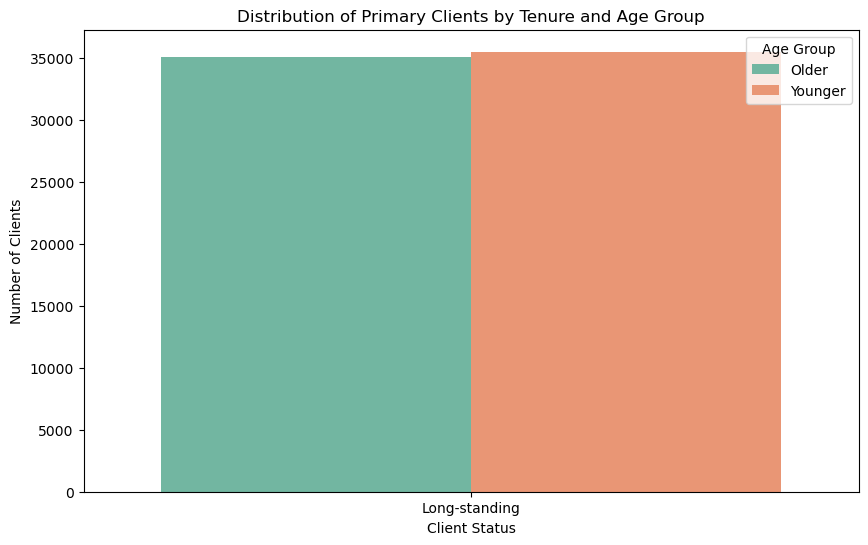

In [228]:
#MAKE A PIE CHART!!!!!! ASAP 

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='client_status', y='count', hue='age_group', data=primary_clients, palette='Set2')

# Adding titles and labels
plt.title('Distribution of Primary Clients by Tenure and Age Group')
plt.xlabel('Client Status')
plt.ylabel('Number of Clients')
plt.legend(title='Age Group')
plt.show()

## 2.1.4 Cleaning df_final_demo 

First, we will take a look at which columns are completly empty (except for client_id, whic does not have any null values).

In [229]:
null_rows = df_final_demo[df_final_demo["bal"].isnull()]
null_rows

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older


Secondly, we will remove all these rows.

In [230]:

df_final_demo.dropna(subset = "bal", inplace=True) 

In [231]:
df_final_demo.dropna(subset = "clnt_age", inplace=True)

Finally, we will take a look a the types of each column and make adjustments if needed.

In [232]:
df_final_demo.dtypes # Client id should be an string because it is categorical data

client_id                int64
clnt_tenure_yr         float64
clnt_tenure_mnth       float64
clnt_age               float64
gendr                   object
num_accts              float64
bal                    float64
calls_6_mnth           float64
logons_6_mnth          float64
total_tenure_months    float64
client_status           object
age_group               object
dtype: object

## 2.2.1 Importing DataFrame Part 1 which provides information about the visits to Vanguard

In [233]:
df_pt1 = pd.read_csv("data/df_final_web_data_pt_1.txt")
df_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


There aren't any null values, so we do not have to clean anything.

In [234]:
df_pt1.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

## 2.3.1 - Importing DataFrame Part 2 

In [235]:
df_pt2 = pd.read_csv("data/df_final_web_data_pt_2.txt")
df_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [236]:
df_pt2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

## 2.3.2 - Merging the Twin Dataframes

DataFrame Part 2 is an extension to DataFrame Part 1; therefore, they should be merged.

In [237]:

df = pd.concat([df_pt1, df_pt2], axis = 0)
df.sort_values(by="client_id", ascending=True, inplace=True)
df

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
305388,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28


## 2.4.1 - Importing Data Frame about the different groups of clients (Test/Control)

In [238]:
df_final_experiment_clients = pd.read_csv("data/df_final_experiment_clients.txt")
df_final_experiment_clients


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


We want to determine the **size** of each of the groups. 

In [239]:
variation = df_final_experiment_clients.groupby("Variation")
variation.size()

Variation
Control    23532
Test       26968
dtype: int64

Determining the amount of **null values** in the Dataframe

In [240]:
df_final_experiment_clients.isna().sum()

client_id        0
Variation    20109
dtype: int64

# Step 3 - Determining KPI's

Analyze Time Spent on Each Step

In [241]:
# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [242]:
# Sort by visit_id and date_time
df = df.sort_values(by=['visit_id', 'date_time'])

In [243]:
# Calculate time spent on each step
df['time_spent'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()

In [244]:
# Fill NaN values in time_spent with 0 for the first step
df['time_spent'] = df['time_spent'].fillna(0)

In [245]:
# Calculate average time spent on each step
time_spent_summary = df.groupby('process_step')['time_spent'].mean().reset_index()
print("Average Time Spent on Each Step:")
print(time_spent_summary)


Average Time Spent on Each Step:
  process_step  time_spent
0      confirm  117.411594
1        start   59.989108
2       step_1   39.122070
3       step_2   45.542942
4       step_3   98.495340


In [ ]:
# Plotting the average time spent on each step
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='time_spent', data=time_spent_summary, palette='viridis')

# Adding titles and labels
plt.title('Average Time Spent on Each Step')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
process_step_counts = df['process_step'].value_counts()
process_step_counts

In [ ]:
# Count the occurrences of each process step
process_step_counts = df['process_step'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
process_step_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

# KPI's

In [ ]:
new_df = pd.merge(df_final_demo, df, how="left", on = "client_id")

variation_df = pd.merge(new_df, df_final_experiment_clients, on = "client_id", how="inner") # We are using an inner join bc we do not care about client's that did not go thru the process
variation_df.reset_index()
variation_df

In [ ]:
variation_df.dropna(subset="Variation", inplace = True)

In [ ]:
# Total number of sessions for each group
total_sessions = variation_df.groupby('Variation')['visit_id'].nunique().reset_index(name='total_sessions')

# Filter the data to only include rows where process_step is "confirm"
confirm_steps = variation_df[variation_df['process_step'] == 'confirm']

# Count the number of sessions that reached the "confirm" step for each group
confirm_sessions = confirm_steps.groupby('Variation')['visit_id'].nunique().reset_index(name='confirm_sessions')

#Merge total sessions with confirm sessions
completion_data = pd.merge(total_sessions, confirm_sessions, on='Variation')

# Calculate the completion rate
completion_data['completion_rate'] = (completion_data['confirm_sessions'] / completion_data['total_sessions']) * 100

print(completion_data)

In [ ]:
#create a bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x='Variation', y='completion_rate', data=completion_data, palette='Set2')
plt.title('Completion Rate by Variation')
plt.xlabel('Variation')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)
plt.show()

In [ ]:
# Calculate the observed increase in completion rate
completion_rate_control = completion_data.loc[completion_data['Variation'] == 'Control', 'completion_rate'].values[0]
completion_rate_test = completion_data.loc[completion_data['Variation'] == 'Test', 'completion_rate'].values[0]
observed_increase = completion_rate_test - completion_rate_control
print(f"Observed Increase in Completion Rate: {observed_increase:.2f}%")

import numpy as np
from scipy.stats import chi2_contingency

confirm_sessions_control = 16046
total_sessions_control = 32189
confirm_sessions_test = 21731
total_sessions_test = 37136

# Create the contingency table
contingency_table = np.array([
    [confirm_sessions_control, total_sessions_control - confirm_sessions_control],
    [confirm_sessions_test, total_sessions_test - confirm_sessions_test]
])

# Perform the chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

threshold = 5.0  # 5% threshold
if observed_increase >= threshold and p_value < 0.05:
    print("The observed increase in completion rate meets or exceeds the 5% threshold and is statistically significant.")
else:
    print("The observed increase in completion rate does not meet the 5% threshold or is not statistically significant.")


In [ ]:
control_df = variation_df[variation_df["Variation"] == "Control"]
test_df = variation_df[variation_df["Variation"] == "Test"]

In [ ]:
variation_counts = variation_df["Variation"].value_counts()
variation_counts.plot(kind="bar", color = "lightskyblue" )
plt.xlabel("Group")
plt.ylabel("Frequency")

In [ ]:
print(control_df.client_id.count(),test_df.client_id.count())

In [ ]:
# # Function to calculate time spent on each step
# def calculate_step_duration(df):
#     # Ensure 'date_time' is sorted within each user session
#     df = df.sort_values(by=['client_id', 'visitor_id', 'date_time'])
    
#     # Calculate the time spent on each step by finding the difference between consecutive steps
#     df['next_step_time'] = df.groupby(['client_id', 'visitor_id'])['date_time'].shift(-1)
#     df['time_spent'] = (df['next_step_time'] - df['date_time']).dt.total_seconds()
    
#     # Drop rows where 'time_spent' is NaN (e.g., the last step in each session)
#     df = df.dropna(subset=['time_spent'])
    
#     # Calculate the average duration spent on each step
#     avg_duration_per_step = df.groupby('process_step')['time_spent'].mean().reset_index()
#     avg_duration_per_step.columns = ['process_step', 'avg_duration_seconds']
    
#     return avg_duration_per_step

# # Apply the function
# average_duration_per_step = calculate_step_duration(variation_df)

# # Print the results
# print("Average Duration Spent on Each Step (in seconds):")
# print(average_duration_per_step)

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='process_step', y='avg_duration_seconds', data=average_duration_per_step, palette='viridis')
# plt.title('Average Duration Spent on Each Step (in seconds)')
# plt.xlabel('Process Step')
# plt.ylabel('Average Duration (seconds)')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:


# # General function to calculate time spent on each step
# def calculate_step_duration(df):
#     # Ensure 'date_time' is sorted within each user session
#     df = df.sort_values(by=['client_id', 'visitor_id', 'date_time'])
    
#     # Calculate the time spent on each step by finding the difference between consecutive steps
#     df['next_step_time'] = df.groupby(['client_id', 'visitor_id'])['date_time'].shift(-1)
#     df['time_spent'] = (df['next_step_time'] - df['date_time']).dt.total_seconds()
    
#     # Drop rows where 'time_spent' is NaN (e.g., the last step in each session)
#     df = df.dropna(subset=['time_spent'])
    
#     # Calculate the average duration spent on each step
#     avg_duration_per_step = df.groupby('process_step')['time_spent'].mean().reset_index()
#     avg_duration_per_step.columns = ['process_step', 'avg_duration_seconds']
    
#     return avg_duration_per_step

# # Apply the function to control and test dataframes
# average_duration_per_step_control = calculate_step_duration(control_df)
# average_duration_per_step_test = calculate_step_duration(test_df)

# # Print the results
# print("Average Duration Spent on Each Step (Control Group) (in seconds):")
# print(average_duration_per_step_control)

# print("Average Duration Spent on Each Step (Test Group) (in seconds):")
# print(average_duration_per_step_test)



In [ ]:

# Assuming 'variation_df' is your DataFrame and it includes 'date_time' and 'process_step' columns
control_df = variation_df[variation_df["Variation"] == "Control"]
test_df = variation_df[variation_df["Variation"] == "Test"]

# General function to calculate time spent on each step
def calculate_step_duration(df):
    # Ensure 'date_time' is sorted within each user session
    df = df.sort_values(by=['client_id', 'visitor_id', 'date_time'])
    
    # Calculate the time spent on each step by finding the difference between consecutive steps
    df['next_step_time'] = df.groupby(['client_id', 'visitor_id'])['date_time'].shift(-1)
    df['time_spent'] = (df['next_step_time'] - df['date_time']).dt.total_seconds()
    
    # Drop rows where 'time_spent' is NaN (e.g., the last step in each session)
    df = df.dropna(subset=['time_spent'])
    
    # Calculate the average duration spent on each step
    avg_duration_per_step = df.groupby('process_step')['time_spent'].mean().reset_index()
    avg_duration_per_step.columns = ['process_step', 'avg_duration_seconds']
    
    return avg_duration_per_step

# Apply the function to control and test dataframes
average_duration_per_step_control = calculate_step_duration(control_df)
average_duration_per_step_test = calculate_step_duration(test_df)

# Add a column to distinguish between control and test group
average_duration_per_step_control['Group'] = 'Control'
average_duration_per_step_test['Group'] = 'Test'


In [ ]:
# Combine both dataframes
combined_df = pd.concat([average_duration_per_step_control, average_duration_per_step_test])

# Plotting
plt.figure(figsize=(12, 6))

# Create separate palettes for control and test groups
palette = {'Control': 'skyblue', 'Test': 'coral'}

# Create a bar plot using Seaborn
sns.barplot(x='process_step', y='avg_duration_seconds', hue='Group', data=combined_df, palette=palette)

# Set plot title and labels
plt.title('Average Duration Spent on Each Step by Group (in seconds)')
plt.xlabel('Process Step')
plt.ylabel('Average Duration (seconds)')

# Show plot
plt.show()

In [ ]:
# Assuming you have DataFrames `test_df` and `control_df` with a column 'process_step'

# Count the occurrences of each unique value in the 'process_step' column for both DataFrames
process_step_counts_test = test_df['process_step'].value_counts().rename('Test')
process_step_counts_control = control_df['process_step'].value_counts().rename('Control')

# Normalize the counts by the total number of entries in each group
total_test = len(test_df)
total_control = len(control_df)

normalized_test_counts = process_step_counts_test / total_test
normalized_control_counts = process_step_counts_control / total_control

# Combine the normalized counts into a single DataFrame
combined_counts = pd.concat([normalized_test_counts, normalized_control_counts], axis=1).fillna(0)

# Plot a bar chart
plt.figure(figsize=(12, 8))
combined_counts.plot(kind='bar', color=['red', 'skyblue'], width=0.8)
plt.title('Proportional Distribution of Process Steps (Test vs Control Group)')
plt.xlabel('Process Step')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

**Error Rates**

#Sort the data by client_id, visit_id, and date_time to trace the users’ navigation sequence accurately.

In [ ]:
# Sort data by client_id, visit_id, and date_time
variation_df = variation_df.sort_values(by=['client_id', 'visitor_id', 'date_time'])


#Convert time_period to a numeric type: We need to convert time_period to a numeric type if it's not already one, and ensure prev_step is also numeric.

In [ ]:
# Ensure 'time_period' is numeric
variation_df['time_period'] = pd.to_numeric(variation_df['time_period'], errors='coerce')

Determine the frequency of backward navigations for each user in both control and test groups.
Compare the error rates between the two groups to assess if the new UI design reduces or increases errors.

Creating prev_step:

Operation: df.groupby(['client_id', 'visitor_id'])['time_period'].shift(1)
Purpose: This groups the data by client_id and visitor_id, then shifts the time_period column by one position to get the previous step for each user session.
Result: A new column prev_step that shows the previous time_period for each step.

Calculating is_backward:

Operation: df.apply(lambda row: row['time_period'] < row['prev_step'] if pd.notnull(row['prev_step']) else False, axis=1)
Purpose: For each row, compare the current time_period with prev_step. If prev_step is not NaN, check if the current time_period is less than prev_step, indicating a backward navigation. If prev_step is NaN, set is_backward to False.

Result: A new column is_backward that is True if a backward navigation occurred, otherwise False.

In [ ]:
#variation_df[['client_id', 'visitor_id', 'visit_id', 'date_time', 'prev_step','Variation', 'is_backward','process_step','step_index','prev_step_index', 'is_back_track']].head(20)

In [ ]:
#variation_df['is_back_track'].value_counts()

In [ ]:
# Create the new column with the mapped values
mapping = { 'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4 } 
variation_df['step_index'] = variation_df['process_step'].map(mapping)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
variation_df.sort_values(by=['visit_id', 'date_time'])

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
variation_df['prev_step_index'] = variation_df.groupby('visit_id')['step_index'].shift(1)


In [ ]:
# Function to detect backward navigation
variation_df['is_back_track'] = variation_df['prev_step_index'] > variation_df['step_index'] 

Calculated error rates by grouping the data by the variation column and computing the mean of the is_backward column.

In [ ]:
# Calculate error rates
error_rates = variation_df.groupby('Variation')['is_back_track'].mean()

print("Error Rates:")
print(error_rates)

Perform statistical tests (e.g., chi-square test) to determine if the difference in error rates between the control and test groups is statistically significant.

In [ ]:
# Statistical analysis (e.g., chi-square test)
# Create a contingency table
contingency_table = pd.crosstab(variation_df['Variation'], variation_df['is_back_track'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test:\nChi2: {chi2}\np-value: {p}")

In [ ]:
variation_df

Analyze error rates by different segments (e.g., client tenure, age, gender, number of accounts, balance) to identify if specific groups are more prone to errors.
This can help tailor future improvements or targeted interventions for specific client segments.

In [ ]:
# Segmentation analysis (example by client tenure)
segmentation_analysis = variation_df.groupby(['Variation', 'clnt_tenure_yr'])['is_back_track'].mean().unstack()
print("Segmentation Analysis by Client Tenure:")
print(segmentation_analysis)

This approach will help you understand how the new UI affects user behavior, specifically focusing on error rates indicated by backward navigation. The analysis will also provide insights into which segments of users are most affected, enabling more targeted improvements.

In [ ]:
# Visualization 
sns.barplot(x='Variation', y='is_back_track', data=variation_df)
plt.title('Error Rates by Variation')
plt.xlabel('Variation')
plt.ylabel('Error Rate')
plt.show()

Compute the Time Spent on Each Step: Calculate the difference between the timestamps of consecutive steps for each user session.
Aggregate the Time Spent by Step: Average these durations for each step across all user sessions.

Create next_step_time: Use shift(-1) to get the timestamp of the next step within each user session.
Calculate time_spent: Find the difference between next_step_time and date_time, then convert this to seconds.

Drop Rows with NaN time_spent:
Remove rows where time_spent is NaN, which would occur for the last step of each session since there is no next step to compare.
Calculate Average Duration:

Group by process_step and compute the mean of time_spent for each step.
Reset the index and rename columns for clarity.

In [ ]:
variation_df.to_csv('variation.csv', index=False)